### Blast hit output file formatter

Blastnt results

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
DATA_PATH='/mnt/1TB_0/Data/Assembly/PRJNA602160/SRR10915173/'
CONTIGS_PATH=DATA_PATH+'megahit_default/'
BLAST_PATH=DATA_PATH+'Blastn/'
CONTIGS_FILE='SRR10915173_final.contigs.fa'
SRA='SRR10915173'
DB='nt'
RUN_CODE='Megahit_default'
PER_ID = 95
E_VAL=0.01

In [3]:
RESULT_FILE=f'{BLAST_PATH}{SRA}_{RUN_CODE}_PCT{PER_ID}_E{E_VAL}_hsps.csv'

In [4]:
def replace_str2(data):
    #replace exach substring we want to split on so can split all at one
    split_str='*SPLIT*'
    data=data.replace('idx:', '')
    data=data.replace('\n', '')
    data=data.replace(',', ' ')
    data=data.replace('align_title:', split_str)
    data=data.replace('cultivar:', split_str)
    data=data.replace('align_accession:', split_str)
    data=data.replace('align_hit_id:', split_str)
    data=data.replace('align_length:', split_str)
    data=data.replace('query_length:', split_str)
    data=data.split(split_str)
    return data

In [5]:
def replace_str3(data):
    #replace exach substring we want to split on so can split all at one
    split_str='*SPLIT*'
    data=data.replace('\n', '')
    data=data.replace(',', '')
    data=data.replace('hsp_idx:', '')
    data=data.replace('align_length:', split_str)
    data=data.replace('bits:', split_str)
    data=data.replace('expect:', split_str)
    data=data.replace('gaps:', split_str)
    data=data.replace('identities:', split_str)
    data=data.replace('positives:', split_str)
    data=data.replace('sbjct_start:', split_str)
    data=data.replace('sbjct_end:', split_str)
    data=data.split(split_str)
    return data

In [6]:
def read_file(fname):
    file = open(fname, 'r')
    l_datas=[]
    h_datas=[]
    for l in file:
        if l.startswith('idx:'):
            l_data=replace_str2(l)
            l_datas.append(l_data)
            contig=l.split(',')[0].split('idx:')[1]
        else:
            h_data=replace_str3(l)
            h_data.insert(0, contig) 
            h_datas.append(h_data)
    file.close()
    return l_datas, h_datas

In [7]:
l_datas, h_datas=read_file(RESULT_FILE)

In [8]:
def h_df_format(sublists):
    df = DataFrame(sublists,columns=['contig_idx','hsp_idx','align_length','bits','expect',\
                                     'gaps','identities','positives','sbjct_start','sbjct_end'])
    return df

In [9]:
def l_df_format(sublists):
    df = DataFrame(sublists,columns=['idx','align_title','cultivar','align_accession',\
                                     'align_hit_id','align_length','query_length'])
    return df

In [10]:
l_df=l_df_format(l_datas)
l_df.head(n=2)

,idx,align_title,cultivar,align_accession,align_hit_id,align_length,query_length
0,k141_773,gi|1443037137|ref|XR_003241546.1| PREDICTED: ...,XR_003241546,gi|1443037137|ref|XR_003241546.1|,2778,321,None
1,k141_22394,gi|1443098318|ref|XM_015756467.2| PREDICTED: ...,XM_015756467,gi|1443098318|ref|XM_015756467.2|,1768,440,None


In [11]:
h_df=h_df_format(h_datas)
h_df.head(n=2)

,contig_idx,hsp_idx,align_length,bits,expect,gaps,identities,positives,sbjct_start,sbjct_end
0,k141_773,0,321,593.895,1.70258e-165,0,321,321,746,1066 score: 321.0
1,k141_22394,0,440,813.646,0.0,0,440,440,643,204 score: 440.0


In [12]:
titles=l_df['align_title'].tolist()

In [13]:
seqs, counts = np.unique(titles, return_counts=True)

In [14]:
counts, seqs = zip(*sorted(zip(counts, seqs), reverse=True))

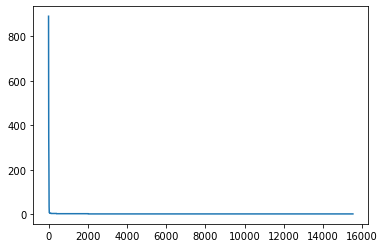

In [15]:
plt.plot(counts)

In [16]:
seqs

(' gi|937893927|dbj|AP014957.1| Oryza sativa Japonica Group DNA  chromosome 1  ',
 ' gi|937906879|dbj|AP014959.1| Oryza sativa Japonica Group DNA  chromosome 3  ',
 ' gi|937901440|dbj|AP014958.1| Oryza sativa Japonica Group DNA  chromosome 2  ',
 ' gi|937912581|dbj|AP014960.1| Oryza sativa Japonica Group DNA  chromosome 4  ',
 ' gi|937916895|dbj|AP014961.1| Oryza sativa Japonica Group DNA  chromosome 5  ',
 ' gi|937920774|dbj|AP014962.1| Oryza sativa Japonica Group DNA  chromosome 6  ',
 ' gi|937924750|dbj|AP014963.1| Oryza sativa Japonica Group DNA  chromosome 7  ',
 ' gi|1189419122|gb|CP018164.1| Oryza sativa Indica Group cultivar Shuhui498 chromosome 8 sequence  ',
 ' gi|937940524|dbj|AP014968.1| Oryza sativa Japonica Group DNA  chromosome 12  ',
 ' gi|937934639|dbj|AP014966.1| Oryza sativa Japonica Group DNA  chromosome 10  ',
 ' gi|937931852|dbj|AP014965.1| Oryza sativa Japonica Group DNA  chromosome 9  ',
 ' gi|937937345|dbj|AP014967.1| Oryza sativa Japonica Group DNA  chromosome

### Non rice sequences

In [17]:
non_oryza = [x for x in titles if 'oryza' not in x.lower()]
non_oryza = [x for x in non_oryza if 'O.sativa' not in x]

In [18]:
seqs_non_oryza, counts_non_oryza = np.unique(non_oryza, return_counts=True)

In [19]:
counts_non_oryza, seqs_non_oryza = zip(*sorted(zip(counts_non_oryza, seqs_non_oryza), reverse=True))

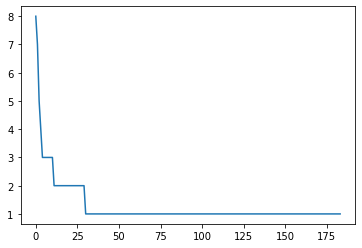

In [20]:
plt.plot(counts_non_oryza)

In [21]:
seqs_non_oryza

(' gi|1238280724|gb|KY962518.1| Homo sapiens external transcribed spacer 18S ribosomal RNA gene  internal transcribed spacer 1  5.8S ribosomal RNA gene  internal transcribed spacer 2  28S ribosomal RNA gene  and external transcribed spacer  complete sequence  ',
 ' gi|1212788596|gb|MF164268.1| Homo sapiens clone BAC JH12 genomic sequence  ',
 ' gi|1548994296|gb|CP034500.1| Eukaryotic synthetic construct chromosome 21 >gi|1549098691|gb|CP034525.1| Eukaryotic synthetic construct chromosome 21  ',
 ' gi|685042446|emb|LN590971.1| Cyprinus carpio genome assembly common carp genome  scaffold 000000985  ',
 ' gi|38304177|emb|AL591856.26| Human DNA sequence from clone RP11-426M5  complete sequence  ',
 ' gi|342672139|gb|AC245410.1| Homo sapiens FOSMID clone ABC10-45511800E2 from chromosome unknown  complete sequence  ',
 ' gi|1909942606|dbj|AP023625.1| Homo sapiens DNA  sequence_id: unplaced_0140  ',
 ' gi|1909942589|dbj|AP023608.1| Homo sapiens DNA  sequence_id: unplaced_0123  ',
 ' gi|184898

In [22]:
counts_non_oryza

(8,
 7,
 5,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1)